In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np 
import pandas as pd

In [ ]:
#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#F39FA6", "#7D1E6A", "#FF8D29", "#B22727", "#293462"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

In [3]:
df = pd.read_csv('smoke_detection_iot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [4]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
df.drop(columns = ['Unnamed: 0', 'UTC', 'CNT','Raw H2', 'Raw Ethanol','PM1.0', 'PM2.5','NC0.5', 'NC1.0', 'NC2.5', 'CNT'], axis = 1, inplace = True)

In [8]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Pressure[hPa]     0
Fire Alarm        0
dtype: int64

In [9]:
X = df.iloc[:,:-1]
y = df['Fire Alarm']  

In [10]:
X.shape

(62630, 5)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa]
0,0.530144,0.759851,0.004717,0.000000,0.979021
1,0.585672,0.566243,0.020783,0.000369,0.874903
2,0.489700,0.571052,0.018733,0.000000,0.872239
3,0.996217,0.013342,1.000000,0.065520,0.654235
4,0.540151,0.590909,0.000400,0.000000,0.982129
...,...,...,...,...,...
50099,0.362143,0.076482,0.013017,0.000000,0.648019
50100,0.599097,0.564071,0.018733,0.002349,0.891109
50101,0.597449,0.725411,0.000000,0.000000,0.988123
50102,0.415023,0.576947,0.018800,0.000067,0.883006


In [14]:
X_test_scaled = pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Pressure[hPa]
0,0.528924,0.639577,0.002300,0.000000,0.981980
1,0.565170,0.668379,0.021617,0.000000,0.880089
2,0.797413,0.119570,0.000000,0.000000,0.661846
3,0.493654,0.715242,0.005967,0.000000,0.938042
4,0.215524,0.723961,0.013750,0.011303,0.920578
...,...,...,...,...,...
12521,0.534721,0.570606,0.000000,0.000000,0.975862
12522,0.247376,0.676787,0.020883,0.000000,0.882647
12523,0.597388,0.576366,0.020367,0.000157,0.879088
12524,0.584086,0.531060,0.000000,0.000000,0.724472


In [15]:
from sklearn import svm
model = svm.SVC()

In [16]:
model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(predictions, y_test)


print("Mean Absolute Error with Support Vector Machine: {:,.0f}".format(mae))

Mean Absolute Error with Support Vector Machine: 0


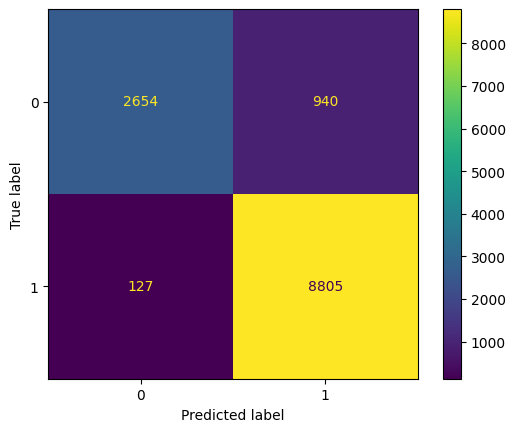

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [19]:
#Classification Report
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      3594
           1       0.90      0.99      0.94      8932

    accuracy                           0.91     12526
   macro avg       0.93      0.86      0.89     12526
weighted avg       0.92      0.91      0.91     12526



In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score with Support Vector Machine: {f1:.2f}")

F1 Score with Support Vector Machine: 0.91


In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with Support Vector Machine: {accuracy:.2f}")

Accuracy with Support Vector Machine: 0.91


In [23]:
import joblib  
# Save the trained model
joblib.dump(model, 'svm_model.joblib')

['svm_model.joblib']